<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/Infographics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load  Libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**# Load  dataset**

In [2]:
# Load  dataset
df = pd.read_csv("/content/Disease_symptom_and_patient_profile_dataset.csv")
df


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


# **Data preprocessing and summary statistics using numpy and pandas**

In [3]:
# Data preprocessing and summary statistics using numpy and pandas
summary_stats = df.describe()
summary_stats

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [5]:
df.isnull()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
344,False,False,False,False,False,False,False,False,False,False
345,False,False,False,False,False,False,False,False,False,False
346,False,False,False,False,False,False,False,False,False,False
347,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

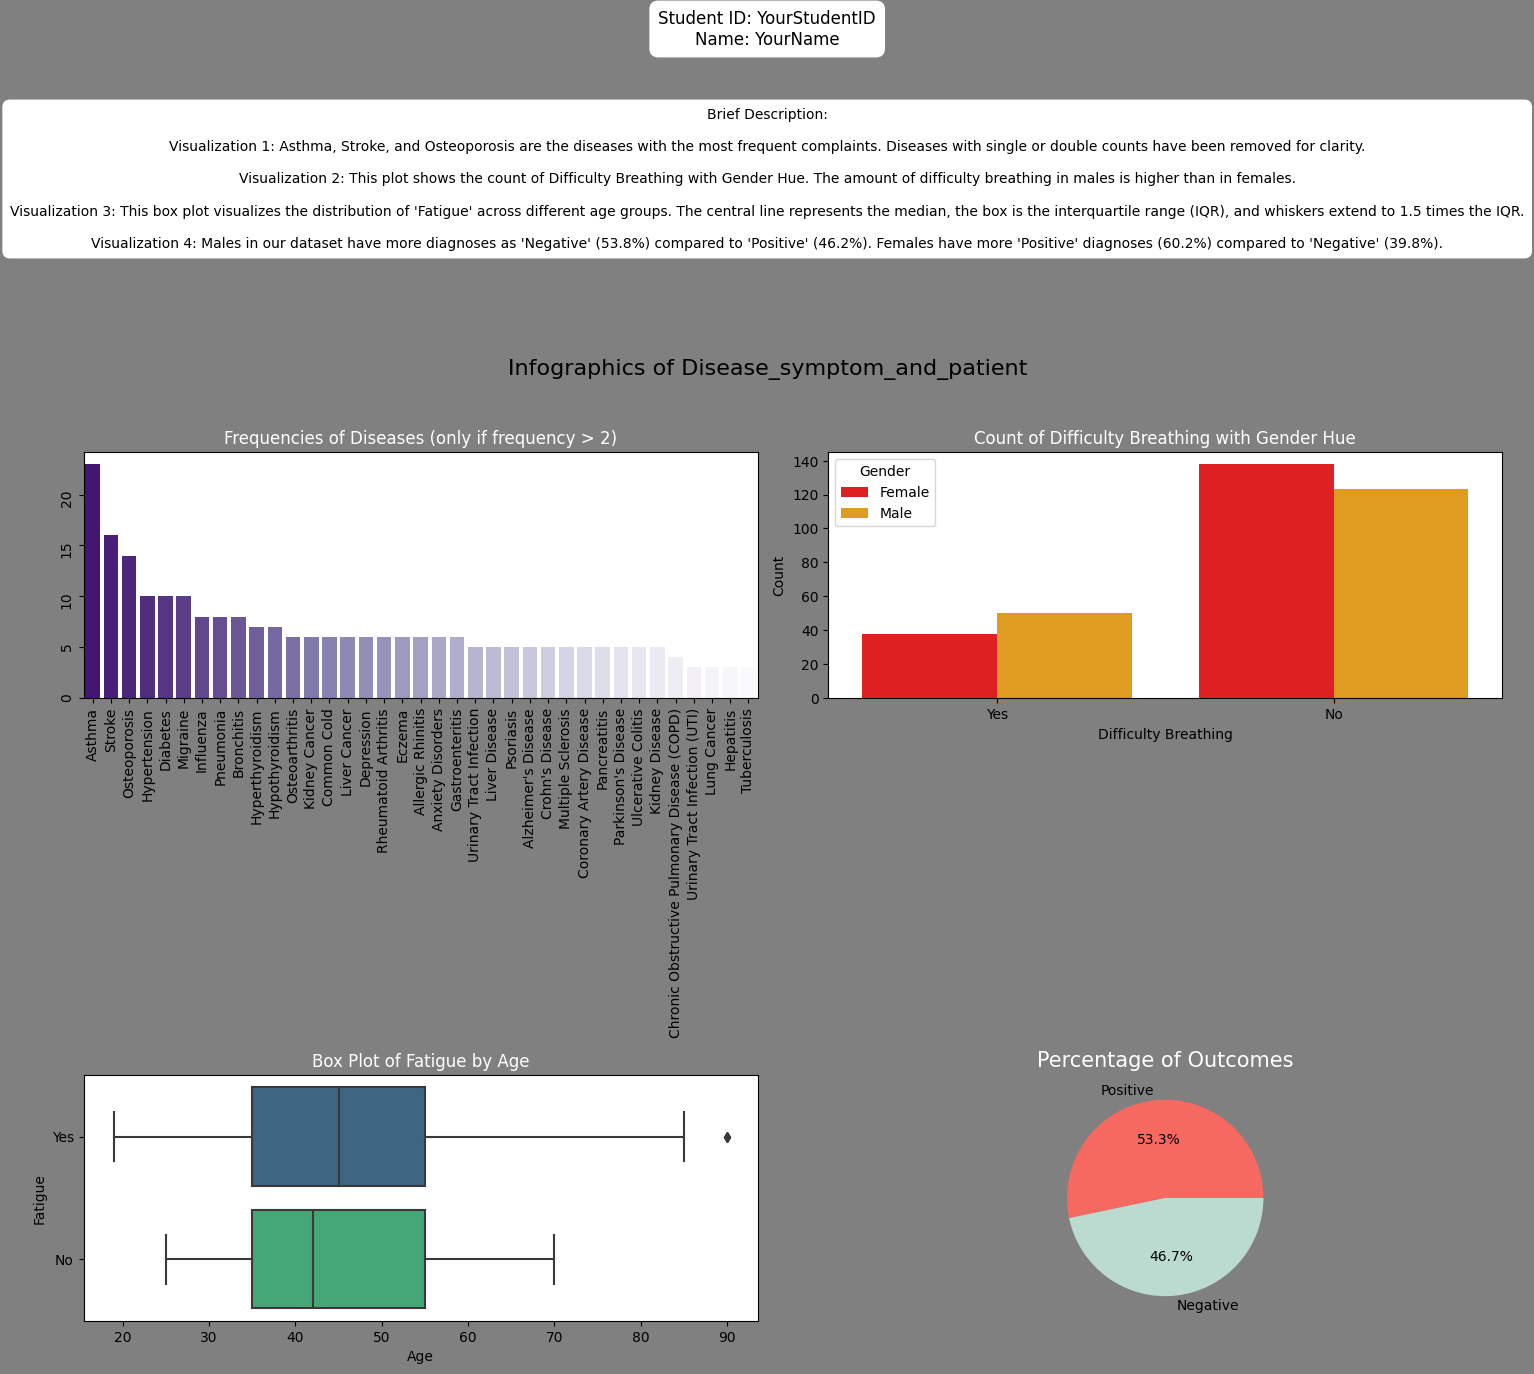

In [26]:
# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10), facecolor='grey')  # Set facecolor

# Add title heading at the top
fig.suptitle("Infographics of Disease_symptom_and_patient", color='black', fontsize=16, y=1.02)

# Visualization 1
a = df['Disease'].value_counts()
sns.barplot(
    x=a[a.values > 2].index,
    y=a[a.values > 2].values,
    palette='Purples_r',
    ax=axes[0, 0]
)
axes[0, 0].tick_params(labelrotation=90)
axes[0, 0].set_title('Frequencies of Diseases (only if frequency > 2)', color='white')  # Set title color to white

# Visualization 2
sns.countplot(x='Difficulty Breathing', hue='Gender', data=df, palette=['Red', 'Orange'], ax=axes[0, 1])
axes[0, 1].set_title('Count of Difficulty Breathing with Gender Hue', color='white')  # Set title color to white
axes[0, 1].set_xlabel('Difficulty Breathing')
axes[0, 1].set_ylabel('Count')

# Visualization 3
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
sns.boxplot(x='Age', y='Fatigue', data=df, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Fatigue by Age', color='white')  # Set title color to white
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Fatigue')

# Visualization 4
# Pie chart for Percentage of Outcomes
axes[1, 1].pie(
    df['Outcome Variable'].value_counts(),
    labels=df['Outcome Variable'].value_counts().index,
    autopct='%1.1f%%',
    colors=['#F56960', "#BBDBD1"]
)
axes[1, 1].set_title('Percentage of Outcomes', fontsize=15, color='white')  # Set title color to white

# Adjust layout
plt.tight_layout()

# Add text annotations to the top and right
student_info_text = (
    "Student ID: YourStudentID\n"
    "Name: YourName"
)

fig.text(
    0.5,   # x-coordinate of the text position (to the right of the subplots)
    1.35,   # y-coordinate of the text position (center)
    student_info_text,
    ha="center",   # horizontal alignment
    va="center",  # vertical alignment
    fontsize=12,
    color="black",  # Set text color to white
    bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5', lw=1)
)

# Brief Description
description_text = (
    "Brief Description:\n\n"
    "Visualization 1: Asthma, Stroke, and Osteoporosis are the diseases with the most frequent complaints. "
    "Diseases with single or double counts have been removed for clarity.\n\n"
    "Visualization 2: This plot shows the count of Difficulty Breathing with Gender Hue. "
    "The amount of difficulty breathing in males is higher than in females.\n\n"
    "Visualization 3: This box plot visualizes the distribution of 'Fatigue' across different age groups. "
    "The central line represents the median, the box is the interquartile range (IQR), and whiskers extend to 1.5 times the IQR.\n\n"
    "Visualization 4: Males in our dataset have more diagnoses as 'Negative' (53.8%) compared to 'Positive' (46.2%). "
    "Females have more 'Positive' diagnoses (60.2%) compared to 'Negative' (39.8%)."
)

fig.text(
    0.5,   # x-coordinate of the text position (center)
    1.20,  # y-coordinate of the text position (above the subplots)
    description_text,
    ha="center",   # horizontal alignment
    va="center",   # vertical alignment
    fontsize=10,
    color="black",  # Set text color to white
    bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5', lw=1)
)

# Save the figure
plt.savefig("your-student-id_combined_plot.png", dpi=300, bbox_inches='tight', facecolor='grey')  # Set facecolor

# Show the plot
plt.show()
